In [1]:
"""#%pip install datasets"""
import ast
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#getdata
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleandata
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\python\libs\miniconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#get only data engineering jobs in US
df_DE_US=df[(df['job_title_short']=="Data Engineer") & (df['job_country']=='United States')].copy()

#drop nan values from 'salary_year_avg' col.
df_DE_US = df_DE_US.dropna(subset=['salary_year_avg'])

In [ ]:
#explode out the job skills so theyre nice and listed AGAIN
df_DE_US=df_DE_US.explode('job_skills')

df_DE_US[['salary_year_avg','job_skills']]

#groupby and with aggregate count the median salary and the count of the job skill avergae
df_DE_US_grouped=df_DE_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

#sort the skills so we get the top 6 skills for data engineers and create a new dataframe with the sorted values
df_DE_wantedskills=df_DE_US_grouped.sort_values(by='median', ascending=False).sort_values(by='count',ascending=False).head(6)
df_DE_wantedskills=df_DE_wantedskills.sort_values(by='median')

#get top 6 values
df_DE_biggestsalary=df_DE_US_grouped.sort_values(by='median', ascending=False).head(6)

df_DE_wantedskills 


,count,median
job_skills,,
sql,2110,125000.00000
azure,961,125000.00000
python,2007,127794.50000
snowflake,765,130700.00000
aws,1313,131000.00000
spark,968,137410.15625


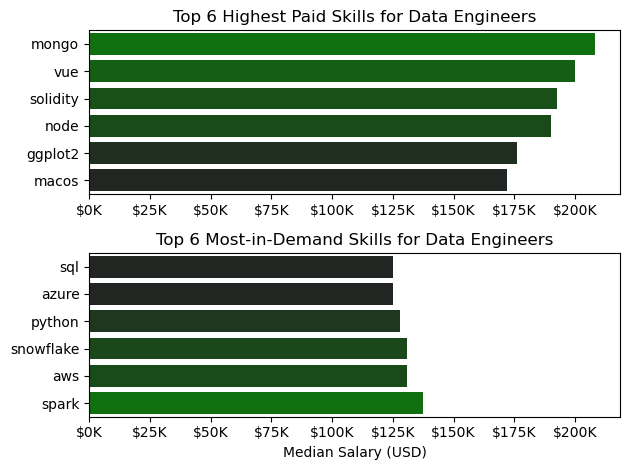

In [ ]:
#graph for top 6 paid skills and top 6 most in demand skills for data engineers
fig, ax = plt.subplots(2, 1)

#barplot construction and formatting
sns.barplot(data=df_DE_biggestsalary, x='median', y=df_DE_biggestsalary.index, ax=ax[0], legend=False, hue='median', palette='dark:g')
ax[0].invert_yaxis
ax[0].set_title('Top 6 Highest Paid Skills for Data Engineers')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

#second barplot construction and formatting
sns.barplot(data=df_DE_wantedskills, x='median', y=df_DE_wantedskills.index, ax=ax[1], legend=False, hue='median', palette='dark:g')
ax[1].invert_yaxis
ax[1].set_title('Top 6 Most-in-Demand Skills for Data Engineers')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())


fig.tight_layout()